Mount google drive

In [1]:
from google.colab import drive
drive.mount('/content/MyDrive/')

Mounted at /content/MyDrive/


Load data

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/MyDrive/MyDrive/Project_Data/supply_train.csv')
df.head()

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [3]:
# Remove unwanted columns
df = df.drop(columns = ['Ware_house_ID', 'WH_Manager_ID'])
df.head()

,Unnamed: 0,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,1,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,3,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [4]:
# check duplicate and NULL
df.duplicated().sum()
df.isna().sum()

Unnamed: 0                         0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      667
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     599
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [5]:
# find approved_wh_govt_certificate colunm count and replace null with common value
df['approved_wh_govt_certificate'].value_counts()
df['approved_wh_govt_certificate'].fillna(value='C',inplace=True)


In [6]:
# update the null 'workers_num' with the mean
df['workers_num'].fillna(value =df['workers_num'].mean(),inplace=True)

In [7]:
# update the null 'workers_num' with the mean
df['workers_num'].fillna(value =df['workers_num'].mean(),inplace=True)

In [8]:
# update the null 'wh_est_year' with the mean
df['wh_est_year'].fillna(value =df['wh_est_year'].mean(),inplace=True)

In [9]:
# Check for missing values
df.isna().sum()

Unnamed: 0                      0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [10]:
# Identify inconsistencies in data for categorical values
cols = ['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone', 'wh_owner_type', 'approved_wh_govt_certificate']
for col in cols:
  values = df[col].value_counts()
  print(f'{col}:\n{values}')

Location_type:
Rural    15272
Urban     1348
Name: Location_type, dtype: int64
WH_capacity_size:
Large    6743
Mid      6691
Small    3186
Name: WH_capacity_size, dtype: int64
zone:
North    6800
West     5320
South    4223
East      277
Name: zone, dtype: int64
WH_regional_zone:
Zone 6    5568
Zone 5    3027
Zone 4    2756
Zone 2    1998
Zone 3    1937
Zone 1    1334
Name: WH_regional_zone, dtype: int64
wh_owner_type:
Company Owned    8975
Rented           7645
Name: wh_owner_type, dtype: int64
approved_wh_govt_certificate:
C     4237
B+    3260
B     3220
A     3132
A+    2771
Name: approved_wh_govt_certificate, dtype: int64


Univariate visuals for the target and all features

Correlations

<ipython-input-15-c2b30400e8a4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


(17.5, -0.5)

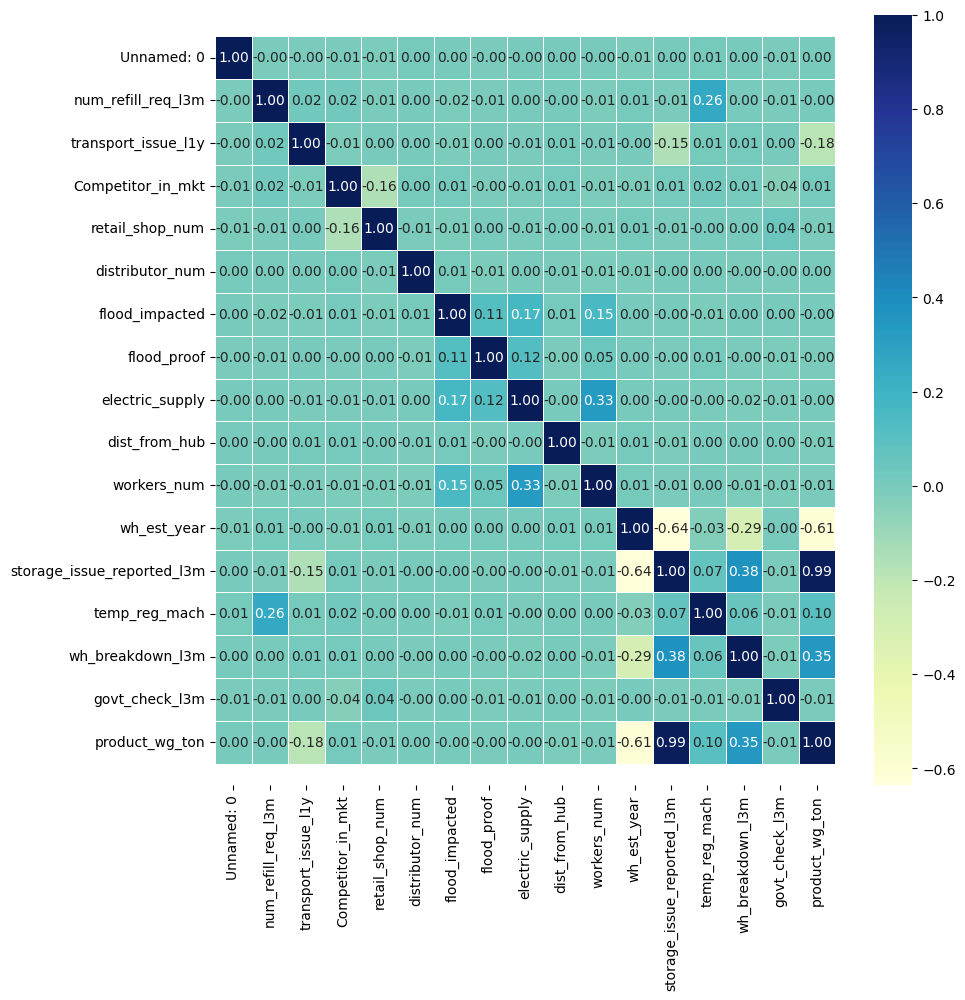

In [15]:
# Identifying any moderate or strong correlations
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<ipython-input-16-030508f39316>:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.drop('product_wg_ton', axis=1).corrwith(df.product_wg_ton).plot(kind='bar', grid=True, figsize=(12, 8),


<Axes: title={'center': 'Correlation with target'}>

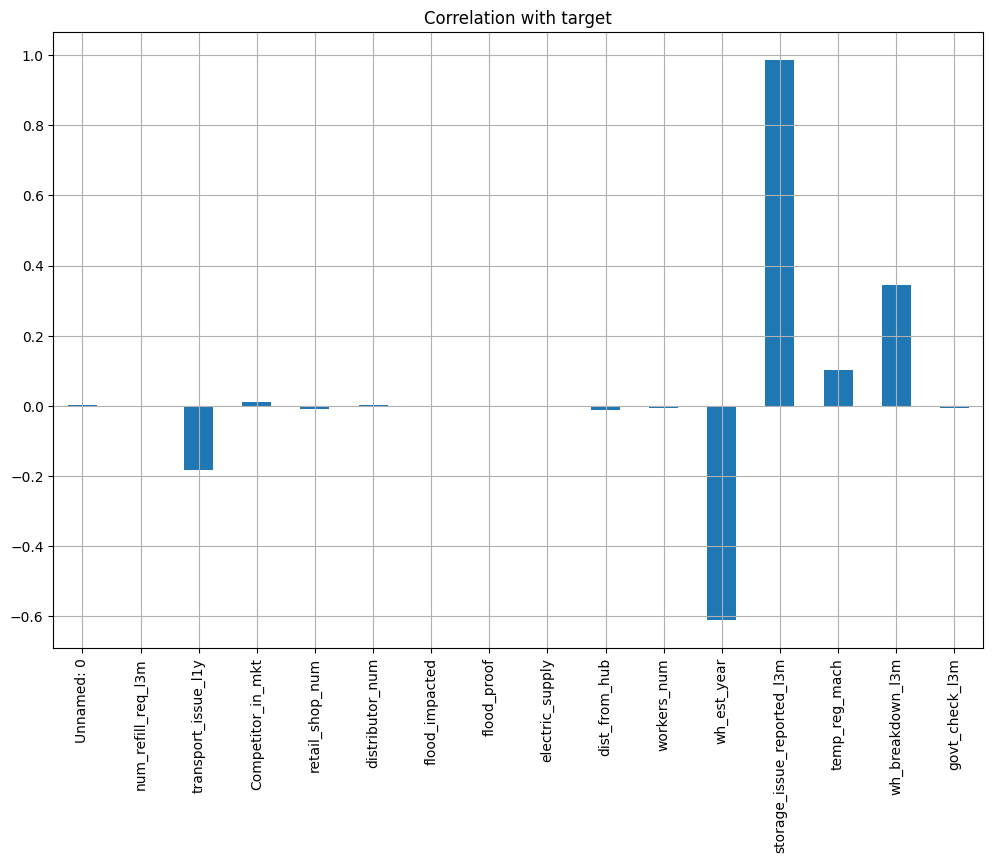

In [16]:
# Check the correlations
df.drop('product_wg_ton', axis=1).corrwith(df.product_wg_ton).plot(kind='bar', grid=True, figsize=(12, 8),
                                                   title="Correlation with target")

'wh_est_year', 'storage_issue_reported_l3m' and 'wh_breakdown_l3m' are the most corrolated with the target.

Text(0.5, 1.0, 'Location_type Distribution')

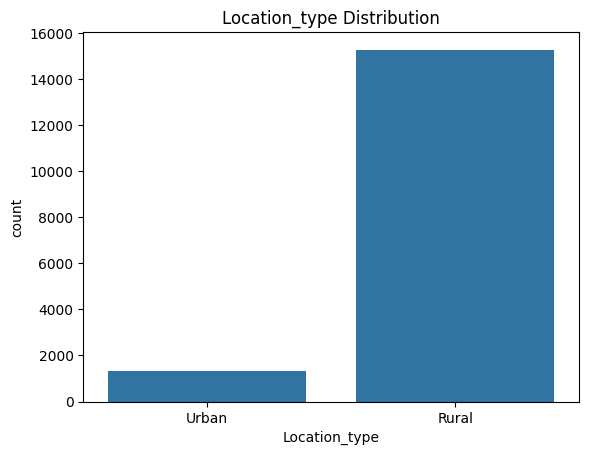

In [17]:
sns.countplot(data=df, x='Location_type')
plt.title(f'Location_type Distribution')

We have a low number of urban zones which may affect the efficiency of the company.

In [21]:
# Calculate the sum of 'product_wg_ton' for all zones
total_weight = df['product_wg_ton'].sum()

# Calculate percentages
df['percentage'] = (df['product_wg_ton'] / total_weight) * 100

In [22]:
x = df.groupby('zone')['percentage'].sum()
print(x)

zone
East      1.701141
North    41.079075
South    25.199206
West     32.020577
Name: percentage, dtype: float64


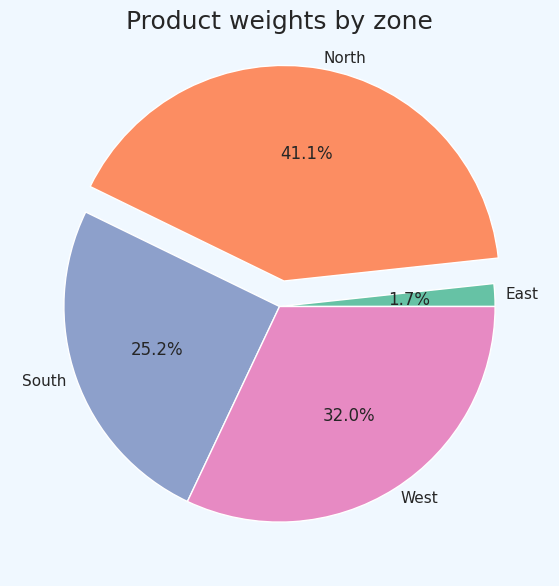

In [23]:
labels = ['East', 'North', 'South', 'West']
sns.set(font_scale = 1)
fig, ax = plt.subplots(figsize=(8, 7), facecolor='aliceblue')
ax.pie(x, labels=labels,
       autopct='%1.1f%%',
       colors=sns.color_palette('Set2'),
       labeldistance=1.05,
       # Add space around only one slice
       explode=[0, 0.12, 0, 0])
plt.title('Product weights by zone', fontsize=18)
plt.show()

41% of Product shipped to North
Lowest percentage is from East and its 1.7%,Company market should improve this area

In [28]:
z = df['WH_capacity_size'].value_counts()
z
w = df.groupby('zone')['WH_capacity_size'].count()
w

zone
East      277
North    6800
South    4223
West     5320
Name: WH_capacity_size, dtype: int64

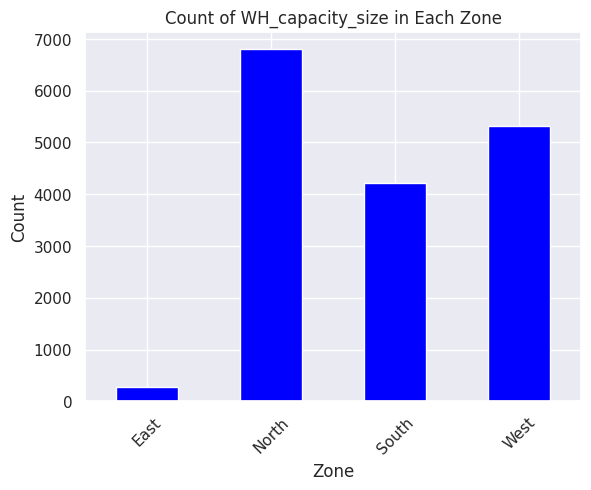

In [29]:
w.plot(kind='bar', color='blue')

# Optional: add labels and title
plt.xlabel('Zone')
plt.ylabel('Count')
plt.title('Count of WH_capacity_size in Each Zone')

# Rotate x-axis labels for better visibility (if needed)
plt.xticks(rotation=45)

# Show the plot
plt.show()

North have Highest capacity and lowest to East

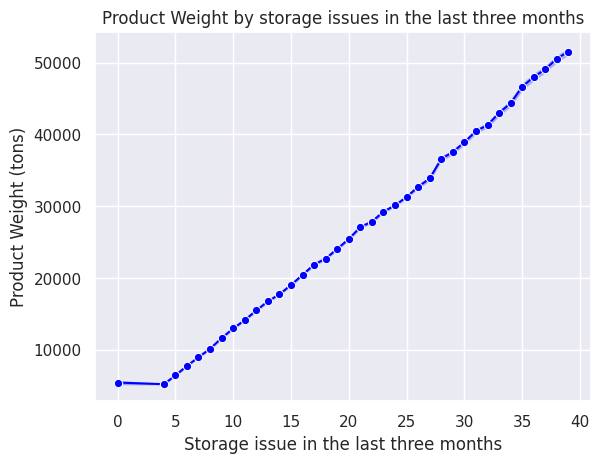

In [41]:
sns.lineplot(data=df, x='storage_issue_reported_l3m', y='product_wg_ton', color='Blue', marker='o')
plt.xlabel('Storage issue in the last three months')
plt.ylabel('Product Weight (tons)')
plt.title('Product Weight by storage issues in the last three months')
plt.show()

Storage issues count is high for the high weighted products